<center> Le boosting

> Introduction rapide

Le boosting consiste à appliquer de façon successive le même algorithme de classement ou de régression, par exemple un arbre de décision, à des versions de l'échantillon initial d'apprentissage qui sont modifiées à chaque étape pour tenir compte des erreurs de classement ou de prédiction de l'étape précédente, puis à combiner les modèles (éventuellement faiblement prédictifs, mais nécessairement plus que le hasard) ainsi construits pour obtenir un modèle final plus performant.

<font color='green'>Les modifications qui surviennent à chaque étape sont une surpondération des observations mal classées ou mal ajustées à l'étape précédente. On force l'apprentissage à se concentrer sur les cas les plus difficiles à prédire ou ajuster, tout en essayant de limiter lors de l'agrégation finale le risque de sur-apprentissage.</font>

<font color='red'>En résumé</font>
> C'est la meilleure manière de faire du ML car le boosting est adaptable à tout algorithme de ML

> Il réduit le risque de surapprentissage

> Il se concentre sur les cas les plus difficiles à prédire ou ajuster

<font color='green'>Adaptation aux algorithmes</font>

> Chargement des librairies

In [1]:
libs <- c("parallel",## Parallélisation : travailler sur tous les coeurs de votre PC
          "caret",
          "C50", 
          "ade4" ,
          "ggplot2", 
          "glmnet",
          "pROC",
          "ROCR",
          "rpart",
          "rpart.plot",
          "nnet",
          "ada",
          "ade4",
          "gbm",
          "xgboost")

for(i in libs){
  if (require(i)==FALSE) install.packages(i)
}

Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"
Warning message:
"package 'parallel' is not available (for R version 4.0.0)"
Warning message:
"package 'parallel' is a base package, and should not be updated"
Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"
also installing the dependencies 'numDeriv', 'SQUAREM', 'colorspace', 'lava', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'plogr', 'prodlim', 'gtable', 'isoband', 'scales', 'iterators', 'data.table', 'dplyr', 'generics', 'gower', 'ipred', 'lubridate', 'tidyr', 'tidyselect', 'timeDate', 'ggplot2', 'foreach', 'plyr', 'ModelMetrics', 'reshape2', 'recipes', 'pROC'




package 'numDeriv' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked
package 'plogr' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked
package 'dply

Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"
also installing the dependencies 'libcoin', 'mvtnorm', 'Formula', 'inum', 'partykit', 'Cubist'




package 'libcoin' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'inum' successfully unpacked and MD5 sums checked
package 'partykit' successfully unpacked and MD5 sums checked
package 'Cubist' successfully unpacked and MD5 sums checked
package 'C50' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"
also installing the dependencies 'pixmap', 'sp'




package 'pixmap' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'ade4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"
also installing the dependency 'shape'




package 'shape' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"


package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"
also installing the dependencies 'bitops', 'gtools', 'gdata', 'caTools', 'gplots'




package 'bitops' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"


package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"


package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"


package 'nnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"


package 'ada' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"


package 'ade4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"
also installing the dependency 'gridExtra'




package 'gridExtra' successfully unpacked and MD5 sums checked
package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


Loading required package: i

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'i'"


package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gruy6\AppData\Local\Temp\RtmpczMYGd\downloaded_packages


In [4]:
library(parallel)
library(doSNOW)
library(caret)
library(C50)
library(ade4)
library(ggplot2)
library(glmnet)
library(pROC)
library(ROCR)
library(rpart)
library(rpart.plot)
library(nnet)
library(ada)
# library(magrittr)
library(dplyr)
library(Matrix)
library(gbm)
library(xgboost)

> Chargement de données

In [6]:
credit <- read.csv("E:/cours_simplon/data_scientist/Machine_learning/Support_Vector_Machine/CLIENT.csv", sep = ',', header=TRUE)
credit <-credit[,-c(1,22)]
credit

typeqipmt,typeqipmt.1,evolution_equip,agelettre,anciennete,ageanc,pres_auto,demenagement,sinistre,devis1,...,ctc,devis2,devis3,devis4,devis5,devis6,devis7,devis8,cyclvie,cliCSP
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,4,3,2,2,4,1,2,1,3,...,1,1,1,3,1,1,1,1,3,2
2,4,3,2,2,4,1,2,1,3,...,2,1,1,3,1,1,1,1,4,2
1,2,1,2,2,4,3,2,1,4,...,1,1,1,4,1,1,1,1,7,7
2,4,3,2,2,4,2,2,1,1,...,2,2,1,4,2,1,1,1,4,1
2,4,3,2,2,4,1,2,1,3,...,2,1,1,3,1,1,1,1,4,2
1,2,1,2,2,4,3,2,1,4,...,2,1,1,3,1,1,1,1,4,1
2,4,3,2,2,4,2,2,1,3,...,2,1,1,3,1,1,1,1,4,10
1,2,1,2,2,4,1,2,1,3,...,1,1,1,4,1,1,1,1,7,7
1,2,1,2,2,4,1,2,0,3,...,1,1,1,4,1,1,1,1,6,8


In [7]:
# Création du train et test set
set.seed(2)
p <- createDataPartition(y=credit$Cible, p=70/100, list=FALSE)
train <- credit[p,]
test <- credit[-p,]

ERROR: Error in createDataPartition(y = credit$Cible, p = 70/100, list = FALSE): y must have at least 2 data points


> AdaBoost

Adaboost (ou adaptive boosting) est une méthode de boosting (intelligence artificielle, apprentissage automatique) introduite par Yoav Freund et Robert Schapire. Ce fut l'une des premières méthodes pleinement fonctionnelles permettant de mettre en œuvre le principe de boosting.
Adaboost repose sur la sélection itérative de classifieur faible en fonction d'une distribution des exemples d'apprentissage. Chaque exemple est pondéré en fonction de sa difficulté avec le classifieur courant.

La recherche d'un modèle prédictif *f* s'obtient généralement en recherchant à l'intérieur d'une famille de modèles celui qui minimise l'espérance d'une fonction de perte l(Y,*f*(X)). <font color='red'>La fonction de perte (le terme perte a été utilisé pour la première fois par Wald, 1939) représente une certaine mesure de la différence entre les valeurs observées des données et les valeurs calculées à l'aide de la fonction d'ajustement C'est la fonction qui est minimisée dans la procédure d'ajustement d'un modèle.</font>

L'algorithme AdaBoost équivaut à une minimisation pas à pas de la fonction de perte exponentielle : à chaque étape, on ajoute un terme qui minimise la fonction de perte. La perte logistique est souvent aussi utilisée.

Dans le script ci-dessous, les paramètres par défaut ont été pris : la fonction de perte exponentielle, le paramètre de pénalisation (nu=1 : c'est à peu près le pas de la descente de gradient ; ce pas peut être réduit pour permettre un meilleur affinage du modèle).

In [8]:
set.seed(235)
boost <- ada(Cible ~. , data = train, loss= "exponential", control = rpart.control(cp=0), iter = 5000, nu = 1,
            test.y = test$Cible, test.x = test[,1:19])
boost
summary(boost)
plot(boost, kappa = F, test = T, tflag = F)

ERROR: Error in terms.formula(formula, data = data): l'argument 'data' est d'un mauvais type


##### On constate un surapprentissage de notre modèle d'entrainement à partir de la 45ème itération; nous constatons alors que les paramètres par défaut de notre modèle, ne permettent pas un meilleur apprentissage. Elargons un peu notre arbre "stumps".

> boosting de "stumps"

Call:
ada(Cible ~ ., data = train, type = "discrete", loss = "exponential", 
    control = rpart.control(maxdepth = 1, cp = -1, minsplit = 0), 
    iter = 5000, nu = 1, test.y = test$Cible, test.x = test[, 
        1:19])

Loss: exponential Method: discrete   Iteration: 5000 

Final Confusion Matrix for Data:
          Final Prediction
True value   0   1
         0 441  45
         1  72 142

Train Error: 0.167 

Out-Of-Bag Error:  0.17  iteration= 4067 

Additional Estimates of number of iterations:

train.err1 train.kap1  test.err2  test.kap2 
      3011       4983         39         75 


Call:
ada(Cible ~ ., data = train, type = "discrete", loss = "exponential", 
    control = rpart.control(maxdepth = 1, cp = -1, minsplit = 0), 
    iter = 5000, nu = 1, test.y = test$Cible, test.x = test[, 
        1:19])

Loss: exponential Method: discrete   Iteration: 5000 

Training Results

Accuracy: 0.833 Kappa: 0.592 

Testing Results

Accuracy: 0.733 Kappa: 0.299 




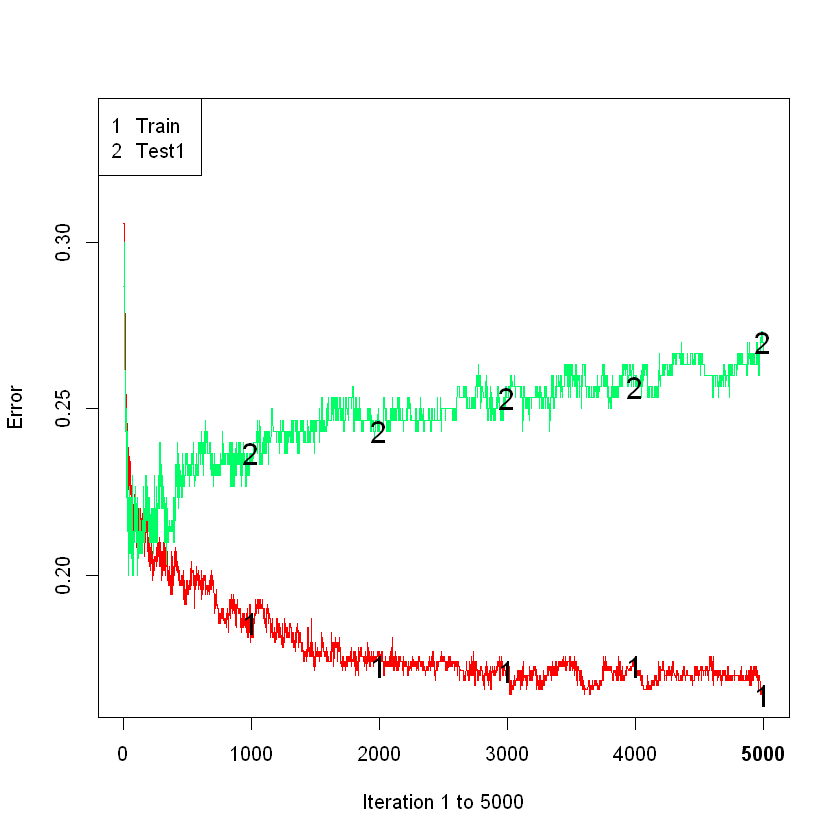

In [6]:
set.seed(235)
boost <- ada(Cible ~. , data = train, type= "discrete", loss= "exponential", control = rpart.control(maxdepth = 1, cp=-1, 
            minsplit = 0), iter = 5000, nu = 1, test.y = test$Cible, test.x = test[,1:19])
boost
summary(boost)
plot(boost, kappa = F, test = T, tflag = F)

[1] 0.7411976

[1] 0.8005868

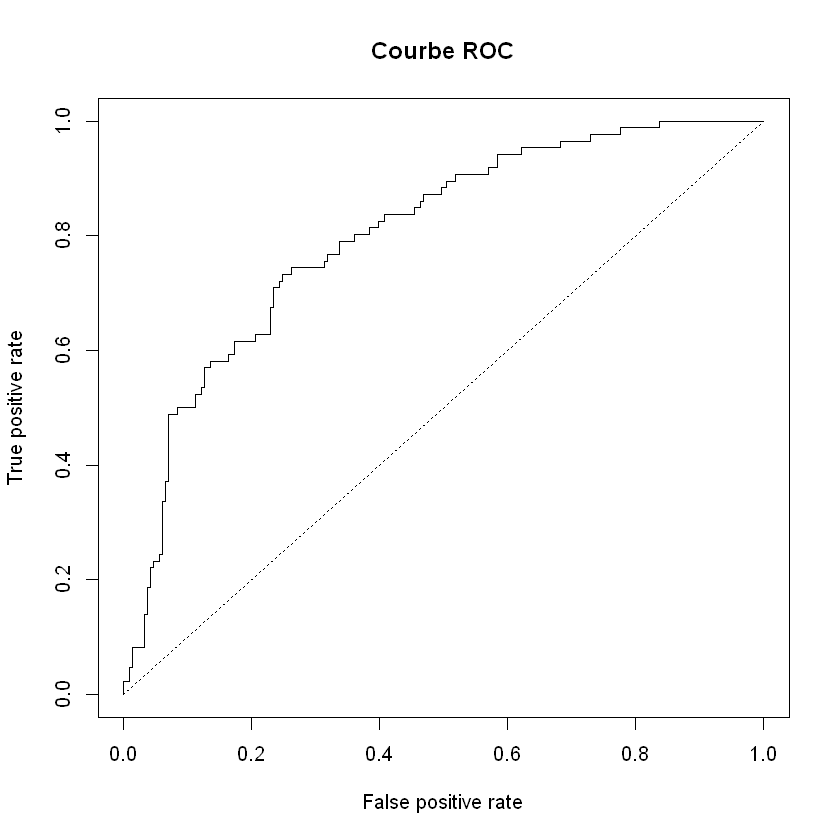

In [7]:
# aire sous la courbe ROC
library(ROCR)
pred_test <- predict(boost, newdata=test, type="prob")[,2]
predTest <- prediction(pred_test,test$Cible,label.ordering=c(0,1))
performance(predTest,"auc")@y.values[[1]]

# aire sous la courbe ROC
library(ROCR)
pred_test <- predict(boost, newdata=test, type="prob", n.iter = 39)[,2] # On rajoute l'itération permettant le taux minimal
predTest <- prediction(pred_test,test$Cible,label.ordering=c(0,1))
performance(predTest,"auc")@y.values[[1]]

# courbe ROC
perf <- performance(predTest,"tpr","fpr")
plot(perf,main='Courbe ROC')
segments(0,0,1,1,lty=3) # ajout diagonale en pointillés

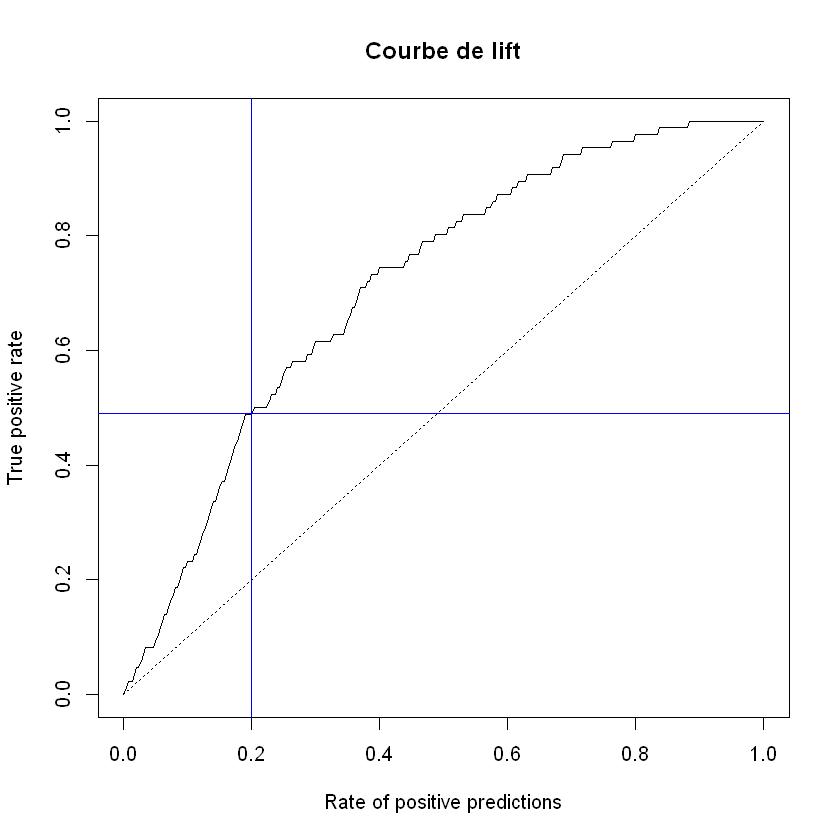

In [8]:
lift <- performance(predTest,"tpr","rpp")# rpp = (TP + FP) / (TP + FP +TN +FN)
plot(lift,main='Courbe de lift')
abline(v=0.2, col="blue", lty=c(1,2))
abline(h=0.49, col="blue", lty=c(1,2))
segments(0,0,1,1,lty=3) # ajout diagonale en pointillés 

### Les deux prochains algorithmes (gbm et xgb) sont tous basés sur la descente de gradient. La différence majeure vient du fait que xgb contrôle mieux le sur-apprentissage et exploite mieux les ressouces de calculs disponibles. 

> Gradient Boosting

Distribution not specified, assuming bernoulli ...


,var,rel.inf
,<fct>,<dbl>
Montant_credit,Montant_credit,17.5203496
Objet_credit,Objet_credit,15.7749945
Age,Age,10.2449839
Duree_credit,Duree_credit,9.7388347
Comptes,Comptes,8.5898041
Historique_credit,Historique_credit,8.3340260
Situation_familiale,Situation_familiale,3.8662790
Biens,Biens,3.7046680
Anciennete_emploi,Anciennete_emploi,3.0167547


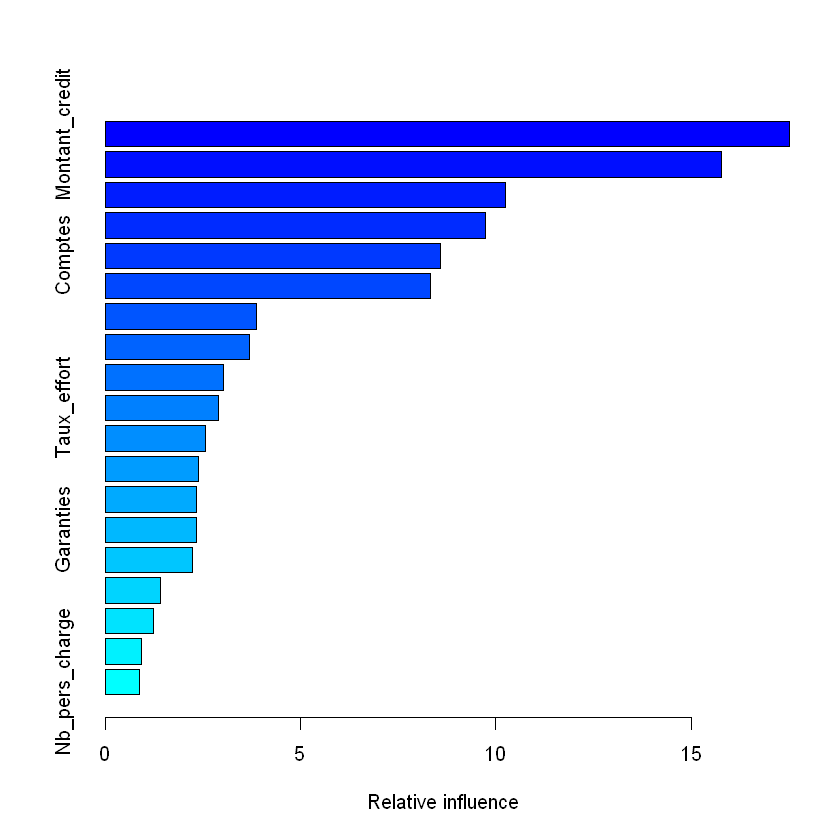

[1] 768

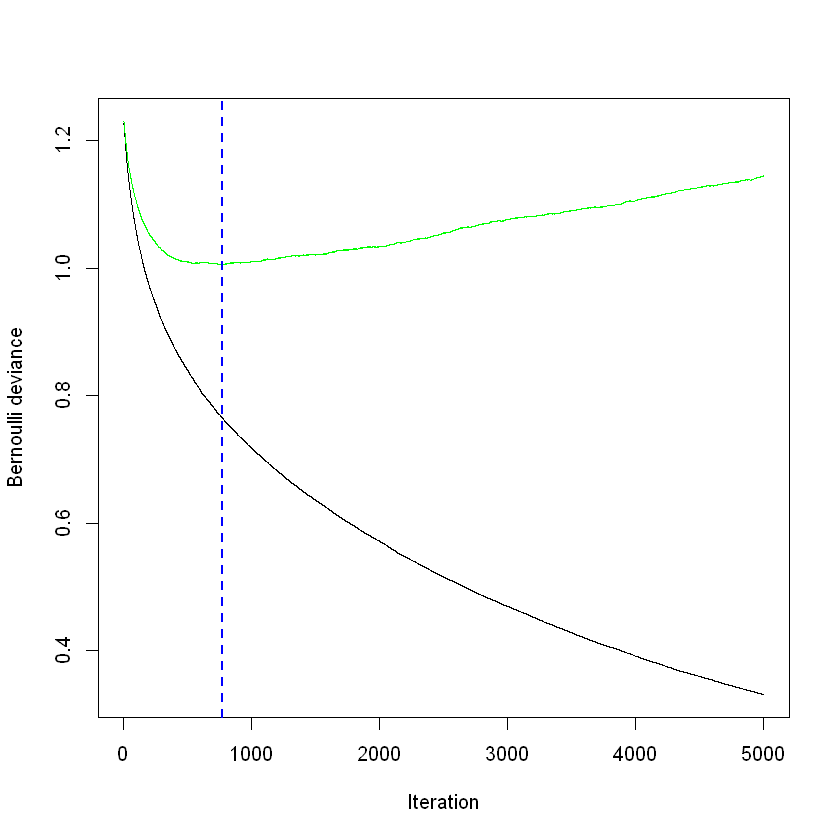

In [9]:
set.seed(1)

m <- gbm(formula = Cible ~. , data = train, n.trees = 5000, interaction.depth = 3, shrinkage = 0.01, cv.folds = 10)
summary(m)
top = gbm.perf(m, method="cv")
top

In [10]:
library(ROCR)
y_pred <- predict.gbm(m, newdata = test, type = 'response')
y_pred <- as.numeric(y_pred>0.5)
cm = table(test$Cible, y_pred)
cm

Using 768 trees...


   y_pred
      0   1
  0 198  16
  1  51  35

> eXtreme Gradient Boosting

>> Pré-traitement de la données

In [11]:
# Create matrix - One-Hot Encoding for Factor variables
trainm <- sparse.model.matrix(Cible ~ ., data = train)
# head(trainm)
train_label <- train[,"Cible"]
train_matrix <- xgb.DMatrix(data = as.matrix(trainm), label = train_label)

testm <- sparse.model.matrix(Cible~., data = test)
# head(testm)
test_label <- test[,"Cible"]
test_matrix <- xgb.DMatrix(data = as.matrix(testm), label = test_label)

>> Paramétrage de l'algo

In [12]:
# Parameters
nc <- length(unique(train_label))
xgb_params <- list("objective" = "multi:softprob",
                   "eval_metric" = "mlogloss",
                   "num_class" = nc)
watchlist <- list(train = train_matrix, test = test_matrix)

>> Entrainement du modèle

Warning message in xgb.train(params = xgb_params, data = train_matrix, nrounds = 5000, :
"xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead."


[1]	train-mlogloss:0.692830	test-mlogloss:0.692869 
[2]	train-mlogloss:0.692514	test-mlogloss:0.692591 
[3]	train-mlogloss:0.692198	test-mlogloss:0.692314 
[4]	train-mlogloss:0.691883	test-mlogloss:0.692037 
[5]	train-mlogloss:0.691570	test-mlogloss:0.691760 
[6]	train-mlogloss:0.691255	test-mlogloss:0.691485 
[7]	train-mlogloss:0.690941	test-mlogloss:0.691210 
[8]	train-mlogloss:0.690630	test-mlogloss:0.690935 
[9]	train-mlogloss:0.690318	test-mlogloss:0.690661 
[10]	train-mlogloss:0.690007	test-mlogloss:0.690388 
[11]	train-mlogloss:0.689695	test-mlogloss:0.690116 
[12]	train-mlogloss:0.689385	test-mlogloss:0.689844 
[13]	train-mlogloss:0.689075	test-mlogloss:0.689572 
[14]	train-mlogloss:0.688767	test-mlogloss:0.689301 
[15]	train-mlogloss:0.688458	test-mlogloss:0.689031 
[16]	train-mlogloss:0.688151	test-mlogloss:0.688761 
[17]	train-mlogloss:0.687844	test-mlogloss:0.688491 
[18]	train-mlogloss:0.687538	test-mlogloss:0.688223 
[19]	train-mlogloss:0.687232	test-mlogloss:0.687955 
[2

[1] 0.47795

,iter,train_mlogloss,test_mlogloss
,<dbl>,<dbl>,<dbl>
4984,4984,0.381844,0.47795


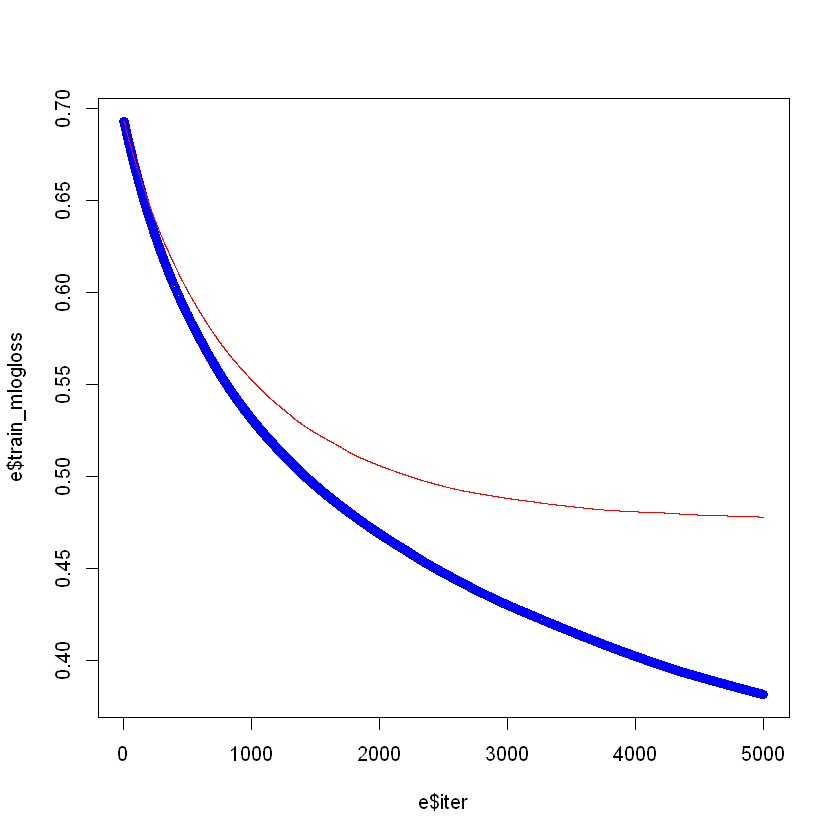

In [13]:
# eXtreme Gradient Boosting Model
bst_model <- xgb.train(params = xgb_params,
                       data = train_matrix,
                       nrounds = 5000,
                       watchlist = watchlist,
                       eta = 0.001,
                       max.depth = 3,
                       gamma = 0,
                       subsample = 1,
                       colsample_bytree = 1,
                       missing = NA
                       )

# Training & test error plot
e <- data.frame(bst_model$evaluation_log)
plot(e$iter, e$train_mlogloss, col = 'blue')
lines(e$iter, e$test_mlogloss, col = 'red')

min(e$test_mlogloss)
e[e$test_mlogloss == 0.47795,]

>> Validation du modèle et variables importantes

                   Feature         Gain        Cover    Frequency
 1:                Comptes 0.2359948289 1.718109e-01 1.103739e-01
 2:         Montant_credit 0.1720225863 1.690496e-01 1.950342e-01
 3:           Duree_credit 0.1486891386 1.440761e-01 1.242923e-01
 4:                    Age 0.0713102757 5.070136e-02 9.860816e-02
 5:     Autres_creditsA143 0.0378124076 3.860324e-02 3.933711e-02
 6:        Objet_creditA41 0.0372742690 7.984769e-02 4.527896e-02
 7:   Historique_creditA34 0.0321099025 4.995345e-02 3.152276e-02
 8:      Anciennete_emploi 0.0319584922 4.740091e-02 3.883581e-02
 9:                Epargne 0.0270688948 4.046651e-02 3.478120e-02
10:          GarantiesA103 0.0226633410 3.132961e-02 2.429818e-02
11:            Taux_effort 0.0194222527 1.689541e-02 2.285327e-02
12:   Historique_creditA33 0.0163843734 1.141353e-02 2.279429e-02
13:    Statut_domicileA152 0.0150296824 1.700471e-02 1.677872e-02
14:        Type_emploiA174 0.0140100348 1.564639e-02 2.081859e-02
15:       

          Actual
Prediction   0   1
         0 195  49
         1  19  37

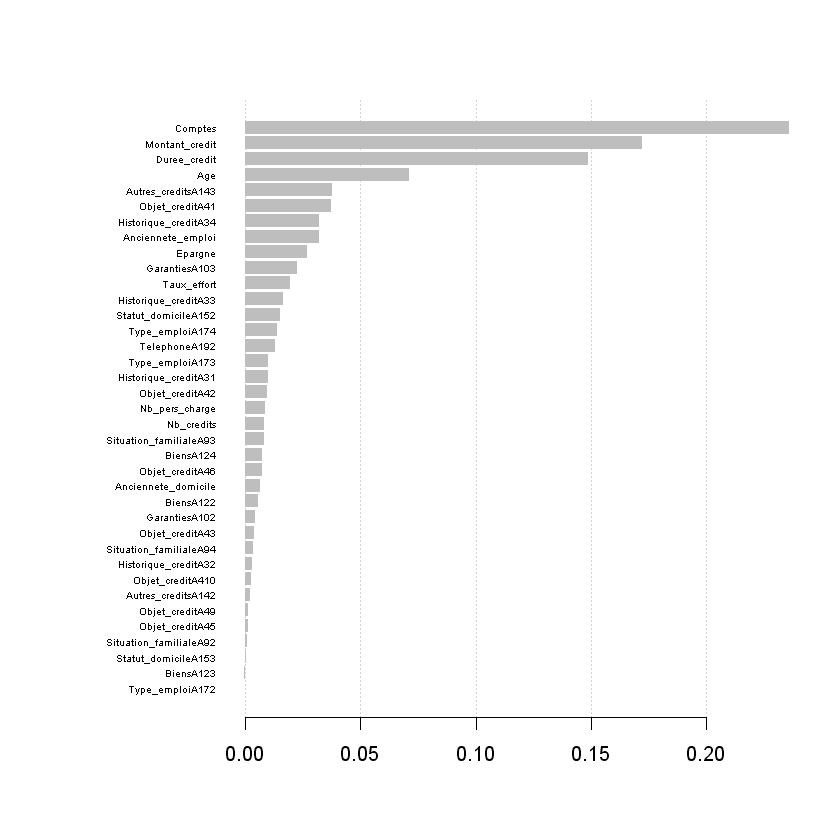

In [41]:
# Feature importance
imp <- xgb.importance(colnames(train_matrix), model = bst_model)
print(imp)
xgb.plot.importance(imp)

# Prediction & confusion matrix - test data
p <- predict(bst_model, newdata = test_matrix)
pred <- matrix(p, nrow = nc, ncol = length(p)/nc) %>%
         t() %>%
         data.frame() %>%
         mutate(label = test_label, max_prob = max.col(., "last")-1)
table(Prediction = pred$max_prob, Actual = pred$label)

>> Boosting avec Caret

In [ ]:
library(DMwR)
train$Cible <- as.factor(train$Cible)
set.seed(256)
train <- SMOTE(Cible ~ ., data  = train)                         
table(train$Cible)

In [ ]:
# Cross validation : k-fold cv
fitControl <- trainControl(method = "repeatedcv", repeats = 30, number = 15, classProbs = TRUE, summaryFunction = twoClassSummary)
# Entrainement du modèle
m <- train(make.names(Cible)~., data = train, method = "gbm", trControl = fitControl, metric = "ROC", tuneLength = 3)
# Prédiction
pred <- predict(m, newdata = test)
pred = as.factor(ifelse(pred == 'X0',0,1))
# Récupération des probabilités
mProbs <- predict(m, newdata = test, type = "prob")
# Matrice de confusion
MC <- confusionMatrix(data = pred, as.factor(test$Cible))
mc<-table(as.factor(test$Cible),pred)
mc
#Taux de prédiction
prediction=mc[2,2]/sum(mc[2,])
print(prediction)